In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC


In [ ]:
class data_loader():
  def __init__(self, data_path):
    self.data_path=data_path

  def load_data(self):
    df= pd.read_csv(self.data_path)
    return df

In [ ]:
train_data_path="/content/drive/MyDrive/ML-1_Project/dry_bean_classification_train.csv"
data_loader_child=data_loader(train_data_path)
df_train=data_loader_child.load_data()

df_train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000,10889.000000
mean,53037.428965,855.112602,319.933861,202.383737,1.581485,0.750187,53757.716319,253.054062,0.749741,0.987139,0.873485,0.800316,0.006560,0.001719,0.644320,0.995074
std,29305.978236,213.927855,85.515726,44.974352,0.246503,0.092504,29760.311469,59.104266,0.048717,0.004615,0.059367,0.061764,0.001128,0.000596,0.099145,0.004317
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.944568,0.489618,0.640577,0.002856,0.000564,0.410339,0.955032
25%,36325.000000,703.597000,253.331461,175.931143,1.429944,0.714801,36713.000000,215.059123,0.718711,0.985623,0.832771,0.762942,0.005883,0.001158,0.582081,0.993709
50%,44665.000000,795.057000,296.875317,192.626917,1.549898,0.764011,45206.000000,238.472733,0.759659,0.988283,0.883335,0.801505,0.006638,0.001695,0.642411,0.996396
75%,61377.000000,976.350000,375.980183,217.434281,1.704556,0.809831,62348.000000,279.548965,0.786445,0.990011,0.916824,0.834630,0.007268,0.002171,0.696607,0.997891
max,254616.000000,1985.370000,738.860154,450.926187,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003573,0.974767,0.999733


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class data_visualization():
  def __init__(self, df):
    self.df=df

  def class_valuecounts(self):

    plt.title("classes and their value counts")
    self.df.groupby('Class').size().plot(xlabel="value counts",kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.gca().spines[['top', 'right',]].set_visible(False)
    print("==========================================================================================================")

  def feature_comparision(self):
    # MinorAxisLength vs AspectRation
    self.df.plot(kind='scatter', x='MinorAxisLength', y='AspectRation', s=32, alpha=.8)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.title("MinorAxisLength vs AspectRation")

    print("==========================================================================================================")

    #MajorAxisLength vs MinorAxisLength
    self.df.plot(kind='scatter', x='MajorAxisLength', y='MinorAxisLength', s=32, alpha=.8)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.title("MajorAxisLength vs MinorAxisLength")
    print("==========================================================================================================")

    # Perimeter vs MajorAxisLength
    self.df.plot(kind='scatter', x='Perimeter', y='MajorAxisLength', s=32, alpha=.8)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.title("Perimeter vs MajorAxisLength")
    print("==========================================================================================================")

    # Class vs Area
    figsize = (5, len(self.df['Class'].unique()))
    plt.figure(figsize=figsize)
    sns.violinplot(self.df, x='Area', y='Class', inner='box', palette='Dark2')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.title("Class vs Area")
    print("==========================================================================================================")

    #Class vs Perimeter
    figsize = (5,5)
    plt.figure(figsize=figsize)
    sns.violinplot(self.df, x='Perimeter', y='Class', inner='box', palette='Dark2')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.title("Class vs Perimeter  ")
    print("==========================================================================================================")

    # Class vs MajorAxisLength
    figsize = (5,5)
    plt.figure(figsize=figsize)
    sns.violinplot(self.df, x='MajorAxisLength', y='Class', inner='box', palette='Dark2')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.title(" Class vs MajorAxisLength")
    print("==========================================================================================================")

    # Class vs MinorAxisLength
    #figsize = (12, 1.2 * len(df['Class'].unique()))
    figsize=(5,5)
    plt.figure(figsize=figsize)
    sns.violinplot(self.df, x='MinorAxisLength', y='Class', inner='box', palette='Dark2')
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.title("Class vs MinorAxisLength")
    print("==========================================================================================================")

    #parameter influence on dataset
    self.df.hist(figsize=(10,10))
    print("==========================================================================================================")

  def corr_matrix(self):
    #correlation matrix
    df_numbersonly= self.df.select_dtypes([float,int])
    correlation_matrix= df_numbersonly.corr()

    plt.figure(figsize=(10,10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
    plt.title("CORRELATION MATRIX")
    print("==========================================================================================================")





<ipython-input-38-7b4df4ee5779>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(self.df, x='Area', y='Class', inner='box', palette='Dark2')


<ipython-input-38-7b4df4ee5779>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(self.df, x='Perimeter', y='Class', inner='box', palette='Dark2')


<ipython-input-38-7b4df4ee5779>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(self.df, x='MajorAxisLength', y='Class', inner='box', palette='Dark2')


<ipython-input-38-7b4df4ee5779>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(self.df, x='MinorAxisLength', y='Class', inner='box', palette='Dark2')


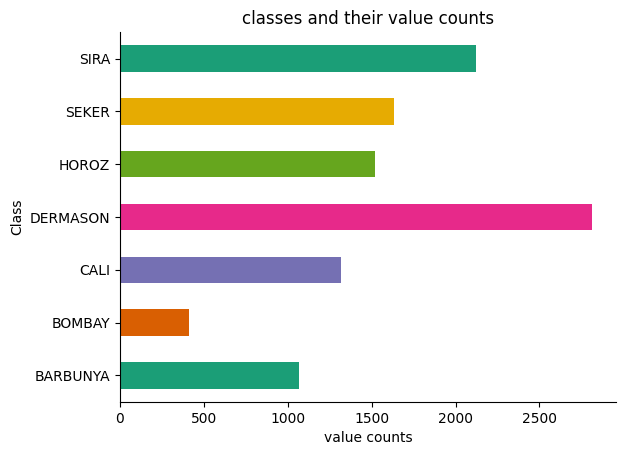

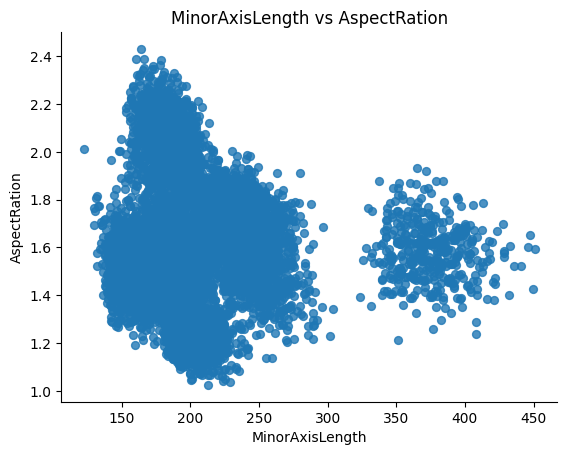

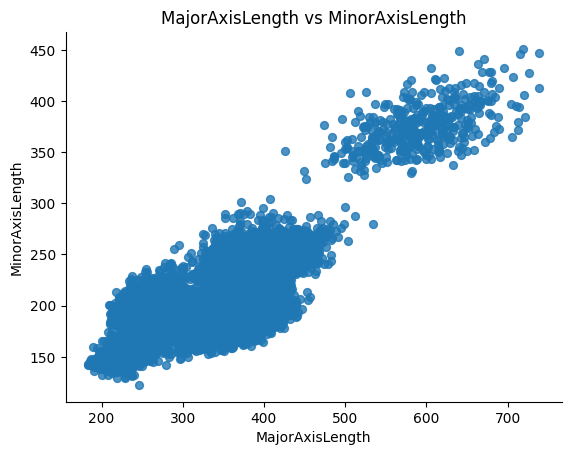

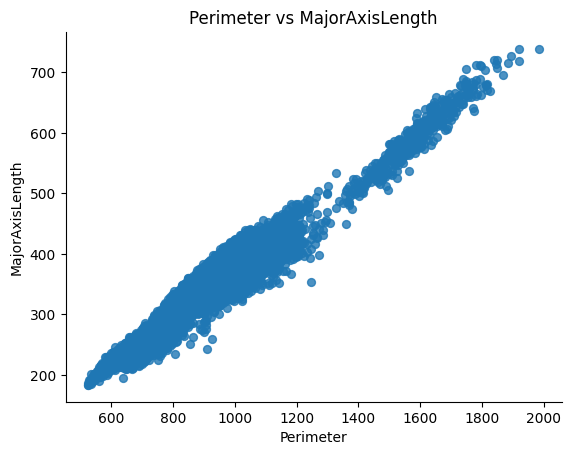

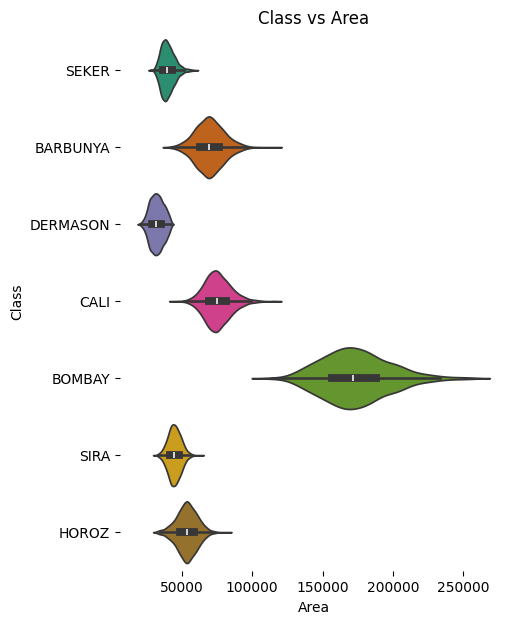

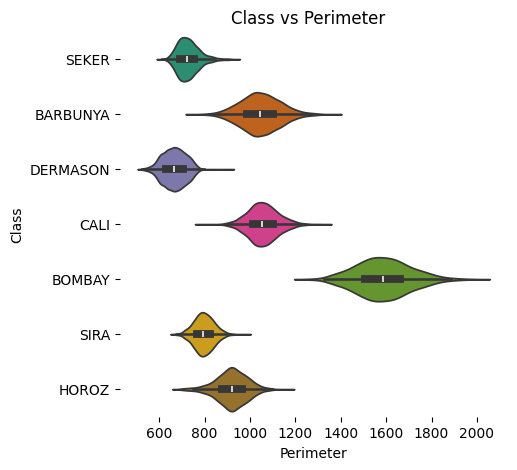

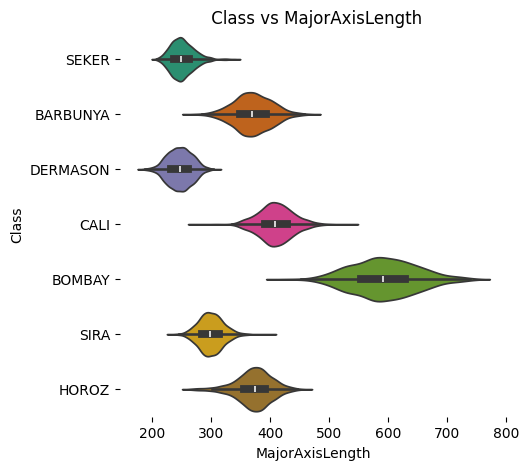

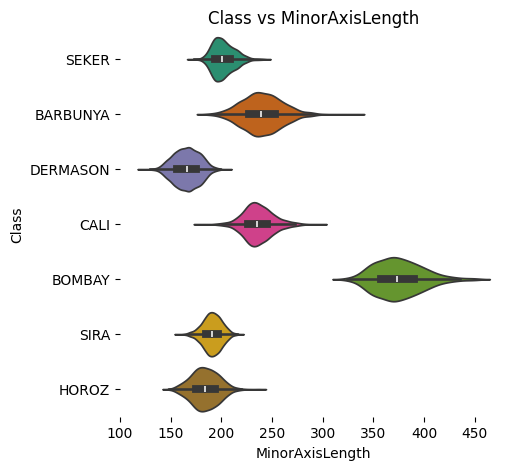

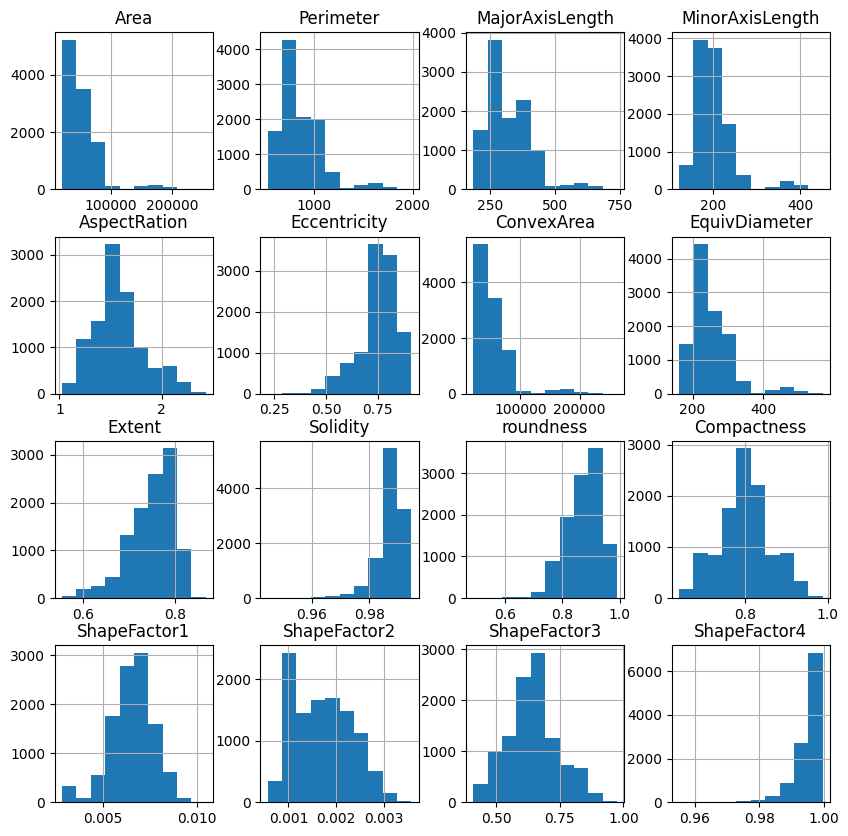

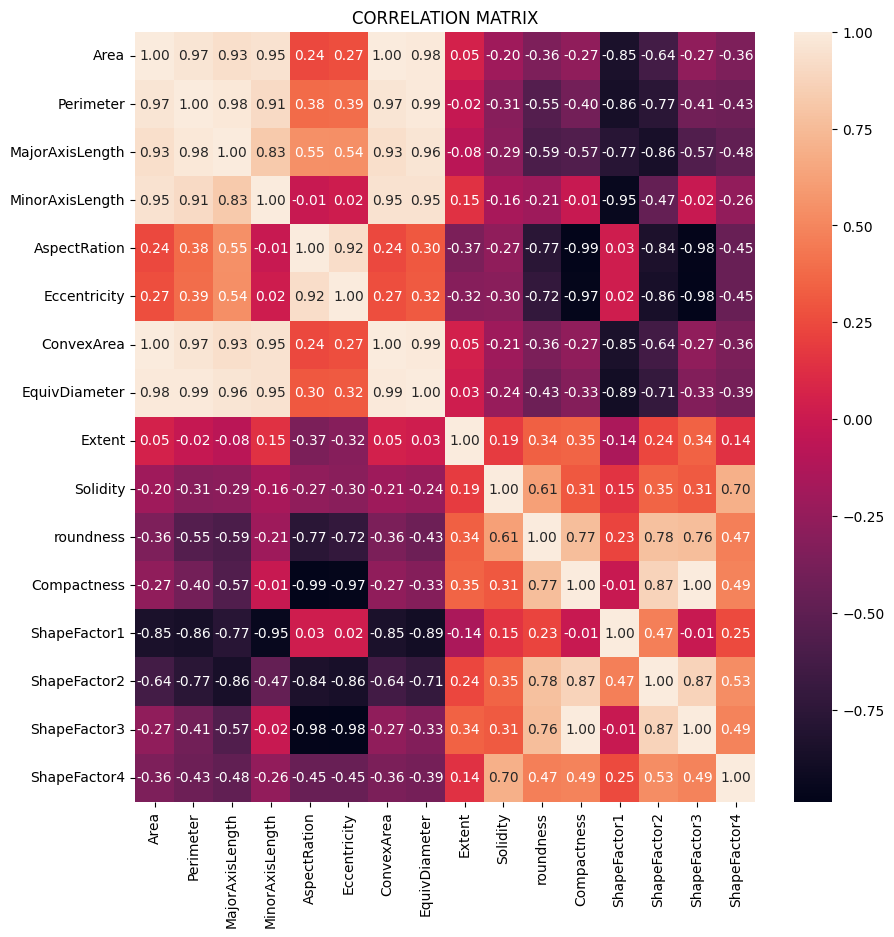

In [ ]:
data_visualization_train_child= data_visualization(df_train)
data_visualization_train_child.class_valuecounts()
data_visualization_train_child.feature_comparision()
data_visualization_train_child.corr_matrix()

In [ ]:
class data_preprocessor():
  def __init__(self,df):
    self.df=df

  def check_missing_values(self):
    missing_values= self.df.isnull().sum()
    print(missing_values)

  def handle_missing_values(self, strategy='mean'):
    if strategy == 'mean':
        self.df.fillna(self.df.mean(), inplace=True)
    elif strategy == 'median':
        self.df.fillna(self.df.median(), inplace=True)
    elif strategy == 'mode': #puts most freq value in place of the missing values
        mode_values = self.df.mode().iloc[0]
        self.df.fillna(mode_values, inplace=True)
    elif strategy == 'constant':
        constant_value = 0
        self.df.fillna(constant_value, inplace=True)
    else:
        raise ValueError(f"Unsupported strategy: {strategy}")
    print(f"Missing values have been handled using the '{strategy}' strategy.")

  def duplicate_removal(self):
    duplicate_rows= self.df.duplicated() #check for duplicates
    duplicate_row_values= self.df[duplicate_rows]
    print("duplicate row values: ")
    print(duplicate_row_values)
    df_cleaned= self.df.drop_duplicates() #removes dupliactes

  def encoder(self):
    #label encoding
    from sklearn.preprocessing import LabelEncoder
    column_name = 'Class'
    label_encoder = LabelEncoder()
    self.df[column_name] = label_encoder.fit_transform(self.df[column_name])
    print("DF after label encoding: ")
    print(self.df)

  def scaler(self):
    #using min max scaler to enclose all values btw 0 and 1
    scaler = MinMaxScaler()
    columns_to_scale = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
                        'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
                        'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
    self.df[columns_to_scale] = scaler.fit_transform(self.df[columns_to_scale])

  def smote_processor(self):
    df_x= self.df.drop(columns=['Class'])
    df_y= self.df['Class']
    smote = SMOTE(random_state=42)
    self.x_cleaned, self.y_cleaned = smote.fit_resample(df_x,df_y)

  # def noise_manager(self):

  #   noise_level = 0.01
  #   noise = np.random.normal(0, x_cleaned.std() * noise_level, x_cleaned.shape)
  #   x_cleaned = smote_processor(self)
  #   df_x= x_cleaned+ df_x

  def noise_manager(self):
    smote = SMOTE(random_state=42) #using smote
    df_x = self.df.drop(columns=['Class'])
    df_y = self.df['Class']
    x_cleaned, y_cleaned = smote.fit_resample(df_x, df_y)
    # adding gaussian noise to clean data
    noise_level = 0.01
    noise = np.random.normal(0, x_cleaned.std() * noise_level, x_cleaned.shape)
    # Add noise to the cleaned data
    x_cleaned_noisy = x_cleaned + noise
    self.df_x_noisy = x_cleaned_noisy
    print("Noise added to cleaned data successfully.")

  def feature_engineer(self,k=11):
    columns = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
    X_df = pd.DataFrame(self.x_cleaned, columns = columns)
    y_df = pd.DataFrame(self.y_cleaned, columns = ['Class'])
    final_df = pd.concat([X_df, y_df], axis = 1)

    #dimensionality reduction
    corr_matrix = final_df.corr()
    cmr_class = abs(corr_matrix['Class'])

    selected_features = cmr_class.nlargest(k).index.tolist()
    print("features that affect class prediction in ascending order:")
    print(selected_features)
    self.selected_features= selected_features

    final_df= final_df[selected_features]
    print("the refined DF now looks like: ")
    print(final_df.head())
    return selected_features,final_df

  # def feature_selection(self):
  #   final_df= self.df[self.selected_features]
  #   print(final_df.head())
  #   return final_df





In [ ]:
train_data_preprocessor_child= data_preprocessor(df_train)
train_data_preprocessor_child.check_missing_values()
train_data_preprocessor_child.handle_missing_values(strategy='mode')
train_data_preprocessor_child.duplicate_removal()
train_data_preprocessor_child.encoder()
train_data_preprocessor_child.scaler()
train_data_preprocessor_child.smote_processor()
train_data_preprocessor_child.noise_manager()
selected_features,df_train= train_data_preprocessor_child.feature_engineer(k=11)
# train_data_preprocessor_child.add_polynomial_features()
# train_data_preprocessor_child.variance_threshold()

df_train.describe()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Missing values have been handled using the 'mode' strategy.
duplicate row values: 
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2038   51894    901.802       367.354766       182.162461      2.016633   
3298   54860    911.589       369.730500       189.842876      1.947561   
3398   60134    984.152       385.504338       199.989509      1.927623   
3525   38891    791.343       319.499996       156.869619      2.036723   
3648   52313    896.732       352.482089       189.300951      1.862020   
4115   51142    898.882       357.519998       182.737640      1.956466   
4250   46863    867.43

,Class,Perimeter,EquivDiameter,ShapeFactor1,MinorAxisLength,MajorAxisLength,ConvexArea,Area,ShapeFactor2,roundness,Solidity
count,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000
mean,3.000000,0.305797,0.305950,0.414685,0.321027,0.323438,0.207370,0.211778,0.324962,0.746870,0.841537
std,2.000051,0.203421,0.209135,0.180775,0.204379,0.207083,0.193678,0.197799,0.205947,0.117972,0.096375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.149545,0.160237,0.318919,0.189968,0.153854,0.082930,0.085071,0.157141,0.664749,0.801910
50%,3.000000,0.264853,0.244126,0.450857,0.246699,0.303721,0.138241,0.141051,0.268090,0.750662,0.865942
75%,5.000000,0.376190,0.363272,0.534742,0.366792,0.402229,0.229792,0.234067,0.474003,0.831988,0.905855
max,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# a=df_train.columns.tolist()
# print(a)

In [ ]:
class data_splitter():
  def __init__(self,df):
    self.df=df

  def train_val_split(self):
    x=self.df.drop(columns=['Class'])
    y=self.df['Class']
    x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)
    return x_train, x_val, y_train, y_val

  def test_x_y_split(self):
    x_test=self.df.drop(columns=['Class'])
    y_test=self.df['Class']
    return x_test,y_test

In [ ]:
data_splitter_child=data_splitter(df_train)
x_train, x_val, y_train, y_val= data_splitter_child.train_val_split()



In [ ]:
class Models:
  def __init__(self, x_train, x_test, y_train, y_test):
      self.x_train = x_train
      self.y_train = y_train
      self.x_test = x_test
      self.y_test = y_test

  def neural_network(self):
      # Function to create the Keras model
      def create_model():
          model = Sequential()
          model.add(Dense(32, input_shape=(10,), activation='relu'))
          model.add(Dense(32, activation='relu'))
          model.add(Dense(7, activation='softmax'))
          model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
          return model

      # Convert the labels to categorical format
      y_train_cat = to_categorical(self.y_train, num_classes=7)
      y_test_cat = to_categorical(self.y_test, num_classes=7)

      # Train the model
      model = create_model()
      history = model.fit(self.x_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.1)

      # Evaluate the model
      neural_network_loss, neural_network_accuracy = model.evaluate(self.x_test, y_test_cat)
      print(f'Test loss: {neural_network_loss}, Test accuracy: {neural_network_accuracy}')

      # Predict on the test set
      predictions = model.predict(self.x_test)
      predictions_classes = predictions.argmax(axis=1)

      # Calculate F1 scores
      f1_macro = f1_score(self.y_test, predictions_classes, average='macro')
      f1_micro = f1_score(self.y_test, predictions_classes, average='micro')
      print("Neural Network Classifier Macro-averaged F1 Score:", f1_macro)
      print("Neural Network Classifier Micro-averaged F1 Score:", f1_micro)

      # Generate confusion matrix
      conf_matrix = confusion_matrix(self.y_test, predictions_classes)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
      plt.xlabel('Predicted labels')
      plt.ylabel('True labels')
      plt.title('Confusion Matrix - ANN')
      plt.show()

      # Perform cross-validation
      cross_val_scores = []
      for i in range(5):
          # Create a new model for each fold
          model = create_model()
          model.fit(self.x_train, y_train_cat, epochs=10, batch_size=32)
          # Evaluate the model
          score = model.evaluate(self.x_test, y_test_cat)
          cross_val_scores.append(score[1])

      print(f'Neural Network Classifier cross-validation scores: {cross_val_scores}')
      print(f'Neural Network Classifier average cross-validation score: {np.mean(cross_val_scores)}')

      # Return the model, predictions, and history
      return model, predictions, history

  def SVM(self):
        svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
        svm_clf.fit(self.x_train, self.y_train)

        predictions = svm_clf.predict(self.x_test)
        nearest_means_accuracy = accuracy_score(self.y_test, predictions)
        print(f"Support vector Classifier accuracy: {nearest_means_accuracy}")

        # Calculate the macro and micro F1 scores
        f1_macro = f1_score(self.y_test, predictions, average='macro')
        f1_micro = f1_score(self.y_test, predictions, average='micro')
        print("Support vector Classifier Macro-averaged F1 Score:", f1_macro)
        print("Support vector Classifier Micro-averaged F1 Score:", f1_micro)

        # Generate a confusion matrix
        conf_matrix = confusion_matrix(self.y_test, predictions)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix - SVC')
        plt.show()

        # Perform cross-validation
        cv_scores = cross_val_score(svm_clf, self.x_train, self.y_train, cv=5, scoring='accuracy')
        print(f'Support vector Classifier cross-validation scores: {cv_scores}')
        print(f'NSupport vector Classifier average cross-validation score: {np.mean(cv_scores)}')

        return svm_clf, predictions


  def nearest_means(self):
      model = NearestCentroid()
      model.fit(self.x_train, self.y_train)
      predictions = model.predict(self.x_test)
      nearest_means_accuracy = accuracy_score(self.y_test, predictions)
      print(f"Nearest Means Classifier accuracy: {nearest_means_accuracy}")

      # Calculate the macro and micro F1 scores
      f1_macro = f1_score(self.y_test, predictions, average='macro')
      f1_micro = f1_score(self.y_test, predictions, average='micro')
      print("Nearest Means Classifier Macro-averaged F1 Score:", f1_macro)
      print("Nearest Means Classifier Micro-averaged F1 Score:", f1_micro)

      # Generate a confusion matrix
      conf_matrix = confusion_matrix(self.y_test, predictions)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
      plt.xlabel('Predicted labels')
      plt.ylabel('True labels')
      plt.title('Confusion Matrix - Nearest Mean')
      plt.show()

      # Perform cross-validation
      cv_scores = cross_val_score(model, self.x_train, self.y_train, cv=5, scoring='accuracy')
      print(f'Nearest Means Classifier cross-validation scores: {cv_scores}')
      print(f'Nearest Means Classifier average cross-validation score: {np.mean(cv_scores)}')

      return model, predictions

  def gradient_boosting_classifier(self):
      # Initialize a Gradient Boosting Classifier
      gbc = GradientBoostingClassifier(random_state=0)

      # Fit the model
      gbc.fit(self.x_train, self.y_train)

      # Predict on the test set
      predictions = gbc.predict(self.x_test)

      # Calculate the accuracy
      gbc_accuracy = accuracy_score(self.y_test, predictions)
      print(f'Gradient Boosting Classifier accuracy: {gbc_accuracy}')

      # Calculate the macro and micro F1 scores
      f1_macro = f1_score(self.y_test, predictions, average='macro')
      f1_micro = f1_score(self.y_test, predictions, average='micro')
      print("Gradient Boosting Classifier Macro-averaged F1 Score:", f1_macro)
      print("Gradient Boosting Classifier Micro-averaged F1 Score:", f1_micro)

      # Generate a confusion matrix
      conf_matrix = confusion_matrix(self.y_test, predictions)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
      plt.xlabel('Predicted labels')
      plt.ylabel('True labels')
      plt.title('Confusion Matrix - Gradient Boost')
      plt.show()

      # Perform cross-validation
      cv_scores = cross_val_score(gbc, self.x_train, self.y_train, cv=5, scoring='accuracy')
      print(f'Gradient Boosting Classifier cross-validation scores: {cv_scores}')
      print(f'Gradient Boosting Classifier average cross-validation score: {np.mean(cv_scores)}')

      return gbc, predictions

  def xgb_classifier(self):
      xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')
      xgb.fit(self.x_train, self.y_train)
      predictions = xgb.predict(self.x_test)
      xgb_accuracy = accuracy_score(self.y_test, predictions)
      print(f'XGBoost Classifier accuracy: {xgb_accuracy}')
      f1_macro = f1_score(self.y_test, predictions, average='macro')
      f1_micro = f1_score(self.y_test, predictions, average='micro')
      print("XGBoost Classifier Macro-averaged F1 Score:", f1_macro)
      print("XGBoost Classifier Micro-averaged F1 Score:", f1_micro)

      conf_matrix = confusion_matrix(self.y_test, predictions)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                  xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
      plt.xlabel('Predicted labels')
      plt.ylabel('True labels')
      plt.title('Confusion Matrix - XGB')
      plt.show()

      # cross-validation
      cv_scores = cross_val_score(xgb, self.x_train, self.y_train, cv=5, scoring='accuracy')
      print(f'XGBoost Classifier cross-validation scores: {cv_scores}')
      print(f'XGBoost Classifier average cross-validation score: {np.mean(cv_scores)}')

      return xgb, predictions

  def trivial_solution(self):
    # class probabilities based on training data
    class_counts = np.bincount(self.y_train)
    class_probabilities = class_counts / len(self.y_train)
    predicted_labels = np.random.choice(np.arange(len(class_counts)), size=len(self.y_test), p=class_probabilities)
    trivial_accuracy = accuracy_score(self.y_test, predicted_labels)
    print("Trivial Solution Accuracy:", trivial_accuracy)

    # Calculate F1-score
    f1_macro = f1_score(self.y_test, predicted_labels, average='macro')
    f1_micro = f1_score(self.y_test, predicted_labels, average='micro')
    print("Trivial Solution Macro-averaged F1 Score:", f1_macro)
    print("Trivial Solution Micro-averaged F1 Score:", f1_micro)

    # confusion matrix
    conf_matrix = confusion_matrix(self.y_test, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=sorted(set(y_val)), yticklabels=sorted(set(y_val)))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Trivial Solution')
    plt.show()

    def trivial_scoring_function(X, y):
        predicted_labels = np.random.choice(np.arange(len(class_counts)), size=len(y), p=class_probabilities)
        return accuracy_score(y, predicted_labels)


Model 1 : Trivial Solution - probability based classifier: 
Trivial Solution Accuracy: 0.14564831261101244
Trivial Solution Macro-averaged F1 Score: 0.1454025198643909
Trivial Solution Micro-averaged F1 Score: 0.14564831261101244


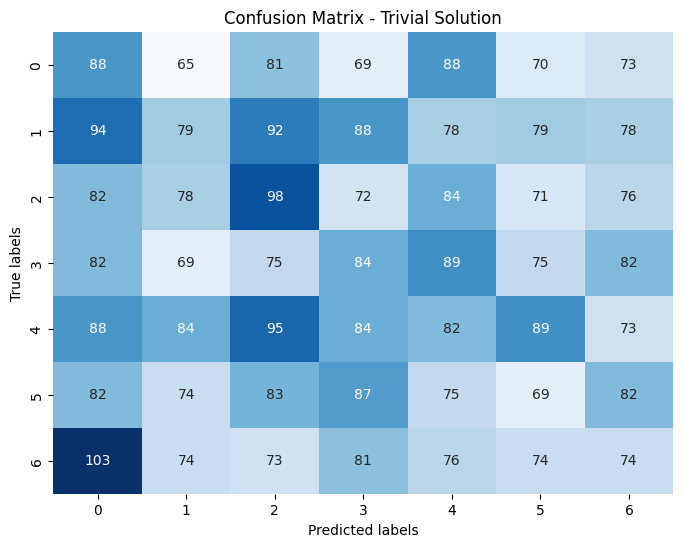

Model 2 : Baseline Solution - Nearest means classifier: 
Nearest Means Classifier accuracy: 0.8774422735346359
Nearest Means Classifier Macro-averaged F1 Score: 0.8756412918380011
Nearest Means Classifier Micro-averaged F1 Score: 0.8774422735346359


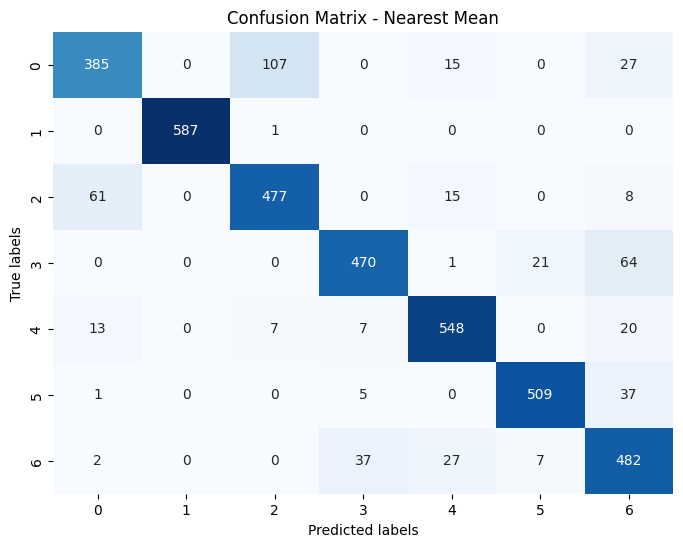

Nearest Means Classifier cross-validation scores: [0.88740882 0.89248335 0.88233428 0.89406914 0.88864213]
Nearest Means Classifier average cross-validation score: 0.8889875446959709
Model 3 : Neural network classifier: 
Epoch 1/50
444/444 [==============================] - 2s 3ms/step - loss: 1.1741 - accuracy: 0.6343 - val_loss: 0.6480 - val_accuracy: 0.8237
Epoch 2/50
444/444 [==============================] - 1s 2ms/step - loss: 0.4640 - accuracy: 0.8606 - val_loss: 0.3881 - val_accuracy: 0.8529
Epoch 3/50
444/444 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8840 - val_loss: 0.3267 - val_accuracy: 0.8763
Epoch 4/50
444/444 [==============================] - 1s 2ms/step - loss: 0.2942 - accuracy: 0.8912 - val_loss: 0.2977 - val_accuracy: 0.8827
Epoch 5/50
444/444 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.8989 - val_loss: 0.2810 - val_accuracy: 0.8884
Epoch 6/50
444/444 [==============================] - 1s 3ms/step - l

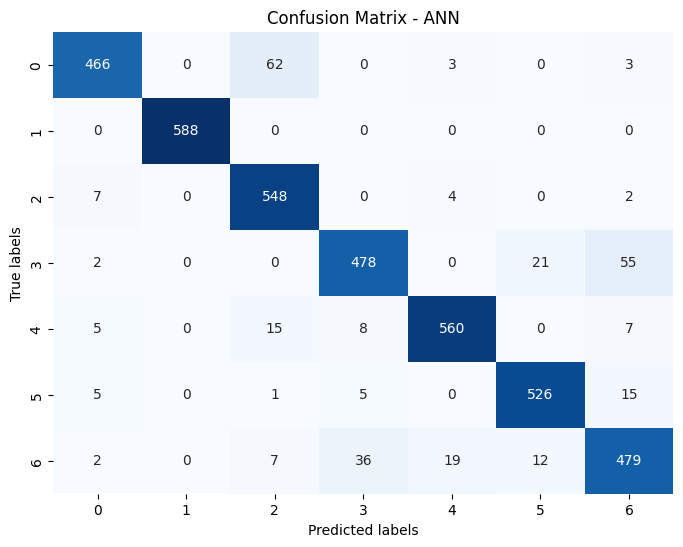

Epoch 1/10
493/493 [==============================] - 2s 3ms/step - loss: 1.0475 - accuracy: 0.6512
Epoch 2/10
493/493 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8577
Epoch 3/10
493/493 [==============================] - 2s 3ms/step - loss: 0.3232 - accuracy: 0.8792
Epoch 4/10
493/493 [==============================] - 2s 3ms/step - loss: 0.2898 - accuracy: 0.8910
Epoch 5/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9047
Epoch 6/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2451 - accuracy: 0.9137
Epoch 7/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2324 - accuracy: 0.9190
Epoch 8/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2219 - accuracy: 0.9216
Epoch 9/10
493/493 [==============================] - 1s 2ms/step - loss: 0.2151 - accuracy: 0.9233
Epoch 10/10
124/124 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9152

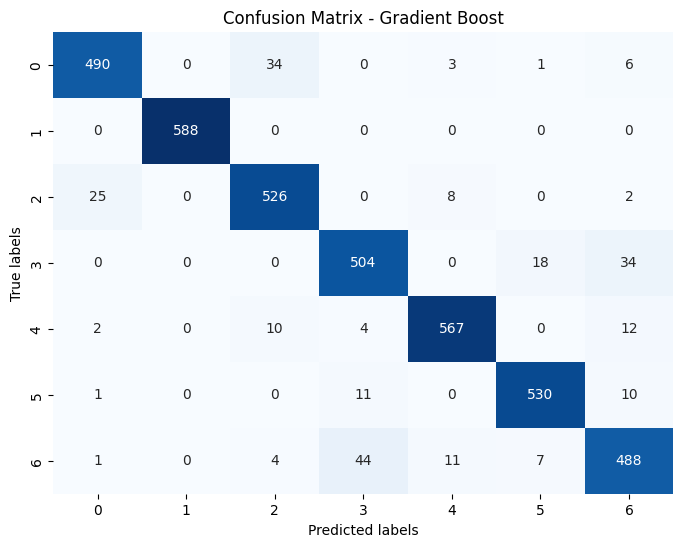

Gradient Boosting Classifier cross-validation scores: [0.93973993 0.9346654  0.93751982 0.94037425 0.93876904]
Gradient Boosting Classifier average cross-validation score: 0.9382136865864595
Model 5 : XGB Classifier: 
XGBoost Classifier accuracy: 0.9408779497589445
XGBoost Classifier Macro-averaged F1 Score: 0.9404292308757503
XGBoost Classifier Micro-averaged F1 Score: 0.9408779497589445


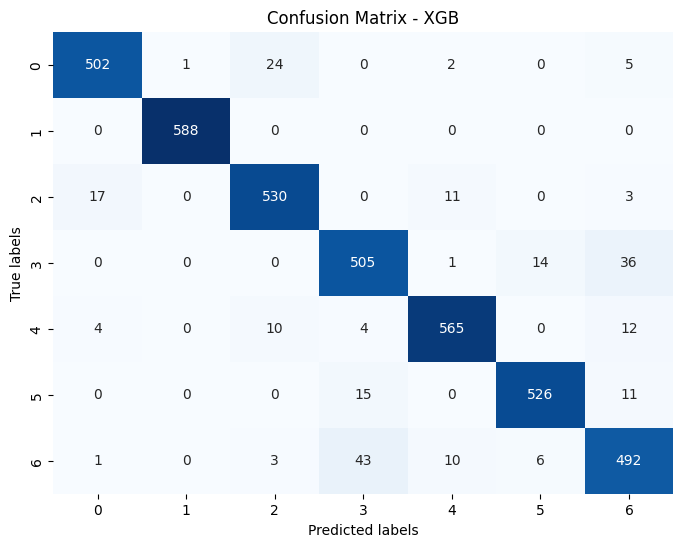

XGBoost Classifier cross-validation scores: [0.94766889 0.94259435 0.94354583 0.94576594 0.94321066]
XGBoost Classifier average cross-validation score: 0.9445571335654867
Model 6 : Support vector Classifier: 
Support vector Classifier accuracy: 0.9264146155798021
Support vector Classifier Macro-averaged F1 Score: 0.9256473714923308
Support vector Classifier Micro-averaged F1 Score: 0.9264146155798021


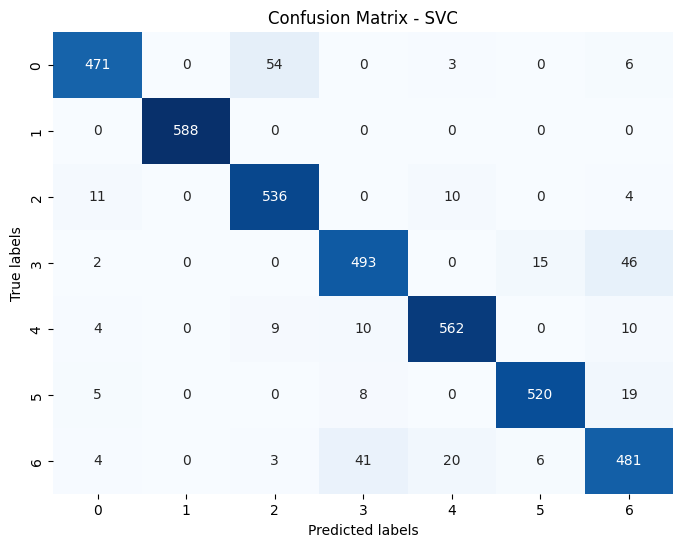

Support vector Classifier cross-validation scores: [0.92895655 0.92515065 0.92419918 0.93529971 0.93115482]
NSupport vector Classifier average cross-validation score: 0.9289521823547311


In [ ]:
classifier_model_child= Models(x_train, x_val, y_train, y_val)
print("===============================================================================")
print("Model 1 : Trivial Solution - probability based classifier: ")
accuray = classifier_model_child.trivial_solution()
print("===============================================================================")

print("===============================================================================")
print("Model 2 : Baseline Solution - Nearest means classifier: ")
model, predictions = classifier_model_child.nearest_means()
print("===============================================================================")

print("===============================================================================")
print("Model 3 : Neural network classifier: ")
model, predictions, history = classifier_model_child.neural_network()
print("===============================================================================")

print("===============================================================================")
print("Model 4 : Gradient Boosting Classifier: ")
gbc,predictions= classifier_model_child.gradient_boosting_classifier()
print("===============================================================================")

print("===============================================================================")
print("Model 5 : XGB Classifier: ")
xgb, predictions= classifier_model_child.xgb_classifier()
print("===============================================================================")

print("===============================================================================")
print("Model 6 : Support vector Classifier: ")
svm, predictions= classifier_model_child.SVM()
print("===============================================================================")


TESTING THE MODELS

In [ ]:
test_data_path="/content/drive/MyDrive/ML-1_Project/dry_bean_classification_test.csv"
data_loader_test_child=data_loader(test_data_path)
df_test=data_loader_test_child.load_data()

df_test.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000,2722.000000
mean,53091.710874,855.966948,320.973968,201.818580,1.590271,0.753727,53810.139603,253.104854,0.749701,0.987157,0.872469,0.798056,0.006579,0.001706,0.640673,0.995022
std,29401.815156,215.769276,86.415207,44.958459,0.247299,0.089924,29838.706397,59.478553,0.050547,0.004840,0.060130,0.061490,0.001128,0.000594,0.098361,0.004559
min,22205.000000,553.600000,190.282632,132.298336,1.060798,0.333680,22532.000000,168.143641,0.570238,0.919246,0.556766,0.653268,0.002778,0.000591,0.426759,0.947687
25%,36355.000000,703.252250,252.896832,175.369379,1.437686,0.718466,36747.000000,215.147909,0.718012,0.985803,0.830012,0.760442,0.005955,0.001138,0.578272,0.993659
50%,44560.000000,793.932500,297.389957,191.736938,1.556550,0.766331,45113.000000,238.192263,0.760420,0.988286,0.882359,0.800030,0.006670,0.001692,0.640047,0.996347
75%,61140.750000,978.567750,378.596290,215.125930,1.714538,0.812294,62123.000000,279.010431,0.788131,0.990017,0.917165,0.832669,0.007293,0.002166,0.693338,0.997845
max,231066.000000,1847.940000,722.494068,460.198497,2.334680,0.903625,232903.000000,542.404248,0.858420,0.994378,0.986115,0.970516,0.009669,0.003665,0.941900,0.999637


In [ ]:
test_data_preprocessor_child= data_preprocessor(df_test)
test_data_preprocessor_child.encoder()
test_data_preprocessor_child.scaler()

df_test= df_test[selected_features]
df_test


DF after label encoding: 
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     28734    638.018       200.524796       182.734419      1.097356   
1     30140    620.134       201.847882       190.279279      1.060798   
2     30279    634.927       212.560556       181.510182      1.171067   
3     30834    631.934       217.227813       180.897469      1.200834   
4     31091    638.558       210.486255       188.326848      1.117665   
...     ...        ...              ...              ...           ...   
2717  41966    746.121       273.508678       195.449153      1.399385   
2718  41995    765.763       284.073178       188.591957      1.506285   
2719  42008    759.454       280.332717       191.218136      1.466036   
2720  42008    773.158       294.492203       181.847359      1.619447   
2721  42139    759.321       281.539928       191.187979      1.472582   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0    

,Class,Perimeter,EquivDiameter,ShapeFactor1,MinorAxisLength,MajorAxisLength,ConvexArea,Area,ShapeFactor2,roundness,Solidity
0,5,0.065221,0.061799,0.609572,0.153815,0.019245,0.031563,0.031260,0.967035,0.769229,0.874986
1,5,0.051404,0.074154,0.568701,0.176825,0.021731,0.037481,0.037992,1.000000,0.997117,0.953616
2,5,0.062833,0.075359,0.615581,0.150082,0.041859,0.038351,0.038657,0.833399,0.901565,0.935202
3,5,0.060520,0.080146,0.619210,0.148213,0.050629,0.040823,0.041315,0.786320,0.963115,0.952505
4,5,0.065638,0.082347,0.579294,0.170871,0.037962,0.042430,0.042545,0.892340,0.934920,0.919548
...,...,...,...,...,...,...,...,...,...,...,...
2717,3,0.148741,0.168363,0.542635,0.192592,0.156378,0.093730,0.094613,0.475053,0.909603,0.985358
2718,3,0.163916,0.168576,0.578488,0.171679,0.176228,0.094809,0.094752,0.403765,0.799314,0.923794
2719,3,0.159042,0.168672,0.565263,0.179688,0.169200,0.094533,0.094814,0.428129,0.834944,0.945865
2720,3,0.169629,0.168672,0.614176,0.151110,0.195805,0.095141,0.094814,0.342897,0.760046,0.906211


In [ ]:
data_splitter_test_child=data_splitter(df_test)
x_test, y_test= data_splitter_test_child.test_x_y_split()

Model 5 : XGB Classifier: 
Gradient Boosting Classifier accuracy: 0.861131520940485
Gradient Boosting Classifier Macro-averaged F1 Score: 0.8720301960858554
Gradient Boosting Classifier Micro-averaged F1 Score: 0.861131520940485
Gradient Boosting Classifier Confusion Matrix:
[[194   0  31   0  11   6  12]
 [  0 108   0   0   0   0   0]
 [ 14   0 253   0  43   0   4]
 [  0   0   0 683   6   0  42]
 [  1   0   0   2 400   0   3]
 [  1   0   0  95   0 284  16]
 [  0   0   0  58  30   3 422]]


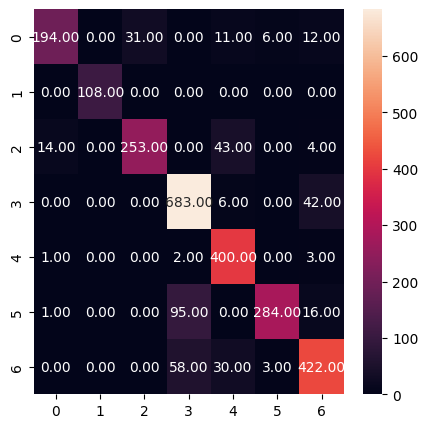

In [ ]:
classifier_model_child= Models(x_train, x_test, y_train, y_test)
# print("===============================================================================")
# print("Model 1 : Trivial Solution - probability based classifier: ")
# accuray = classifier_model_child.trivial_solution()
# print("===============================================================================")

# print("===============================================================================")
# print("Model 2 : Baseline Solution - Nearest means classifier: ")
# model, predictions = classifier_model_child.nearest_means()
# print("===============================================================================")

# print("===============================================================================")
# print("Model 3 : Neural network classifier: ")
# model, predictions, history = classifier_model_child.neural_network()
# print("===============================================================================")

# print("===============================================================================")
# print("Model 4 : Gradient Boosting Classifier: ")
# gbc,predictions= classifier_model_child.gradient_boosting_classifier()
# print("===============================================================================")

print("===============================================================================")
print("Model 5 : XGB Classifier: ")
predictions= xgb.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Gradient Boosting Classifier accuracy: {accuracy}')

# Calculate the macro and micro F1 scores
f1_macro = f1_score(y_test, predictions, average='macro')
f1_micro = f1_score(y_test, predictions, average='micro')
print("Gradient Boosting Classifier Macro-averaged F1 Score:", f1_macro)
print("Gradient Boosting Classifier Micro-averaged F1 Score:", f1_micro)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt=".2f")
print("Gradient Boosting Classifier Confusion Matrix:")
print(conf_matrix)
print("===============================================================================")
